In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.linalg import norm
from PIL import Image
from matplotlib import pyplot as plt, rcParams, rc
from scipy.ndimage import imread
from skimage.measure import block_reduce
import _pickle as pickle
from scipy.ndimage.filters import correlate, convolve
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 6
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    plt.imshow(im, interpolation=None if interp else 'none')

plt.gray()
plt.close()

In [3]:
labels = [i for i in range(0,11)]

channel = [0,1,2,3]
max_frame_number = 40 - 20
instance = [i for i in range(0,25)]
session = [i for i in range(0,10)]
# there is some confusion between session and user 

In [4]:
h5_folder_path = '/home/u12215/deep-soli/SoliData_tmp/dsp'
# this number of folder we would like to use for training: cross training
h5_list = []
for x in labels:
    for y in session:
        for z in instance:
            h5_list.append(h5_folder_path+'/{0}_{1}_{2}.h5'.format(x,y,z))

In [5]:
file_name = h5_list[1010]

In [6]:
len(h5_list)

2750

In [7]:
h5_list[0:1000]
#file_name = '/home/u12215/deep-soli/SoliData_tmp/dsp/0_9_0.h5'

['/home/u12215/deep-soli/SoliData_tmp/dsp/0_0_0.h5',
 '/home/u12215/deep-soli/SoliData_tmp/dsp/0_0_1.h5',
 '/home/u12215/deep-soli/SoliData_tmp/dsp/0_0_2.h5',
 '/home/u12215/deep-soli/SoliData_tmp/dsp/0_0_3.h5',
 '/home/u12215/deep-soli/SoliData_tmp/dsp/0_0_4.h5',
 '/home/u12215/deep-soli/SoliData_tmp/dsp/0_0_5.h5',
 '/home/u12215/deep-soli/SoliData_tmp/dsp/0_0_6.h5',
 '/home/u12215/deep-soli/SoliData_tmp/dsp/0_0_7.h5',
 '/home/u12215/deep-soli/SoliData_tmp/dsp/0_0_8.h5',
 '/home/u12215/deep-soli/SoliData_tmp/dsp/0_0_9.h5',
 '/home/u12215/deep-soli/SoliData_tmp/dsp/0_0_10.h5',
 '/home/u12215/deep-soli/SoliData_tmp/dsp/0_0_11.h5',
 '/home/u12215/deep-soli/SoliData_tmp/dsp/0_0_12.h5',
 '/home/u12215/deep-soli/SoliData_tmp/dsp/0_0_13.h5',
 '/home/u12215/deep-soli/SoliData_tmp/dsp/0_0_14.h5',
 '/home/u12215/deep-soli/SoliData_tmp/dsp/0_0_15.h5',
 '/home/u12215/deep-soli/SoliData_tmp/dsp/0_0_16.h5',
 '/home/u12215/deep-soli/SoliData_tmp/dsp/0_0_17.h5',
 '/home/u12215/deep-soli/SoliData_tmp/

In [39]:
# Demo code to extract data in python
import h5py

use_channel = 0
with h5py.File(file_name, 'r') as f:
    # Data and label are numpy arrays
    data = f['ch{}'.format(use_channel)][()]
    label = f['label'][()]

In [40]:
data.shape

(68, 1024)

In [9]:
def h5file_array(file_name,use_channel = 0):
    
    with h5py.File(file_name, 'r') as f:
    # Data and label are numpy arrays
        data = f['ch{}'.format(use_channel)][()]
        label = f['label'][()]
    return data, label
    

In [10]:
data.shape

(57, 1024)

In [11]:
label.shape

(57, 1)

In [12]:
import numpy as np

In [13]:
data = data.reshape(data.shape[0],32,32)

In [14]:
data.shape

(57, 32, 32)

In [15]:
data[:20].shape

(20, 32, 32)

In [16]:
import matplotlib.pyplot as plt

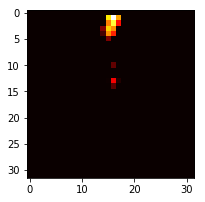

In [17]:
plt.imshow(data[0]).set_cmap('hot')
plt.show()

In [18]:
file_name = h5_list[2010]
data, label = h5file_array(file_name,use_channel=0)
data = data.reshape(data.shape[0],32,32)

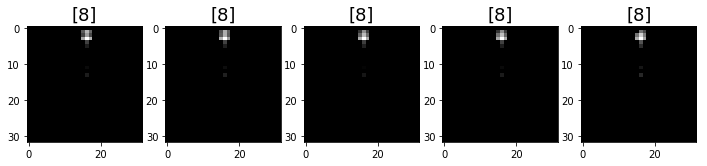

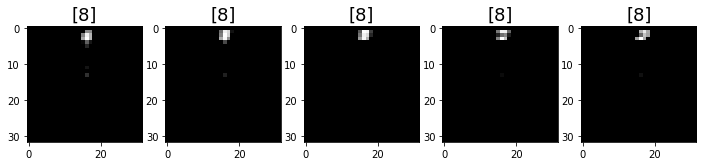

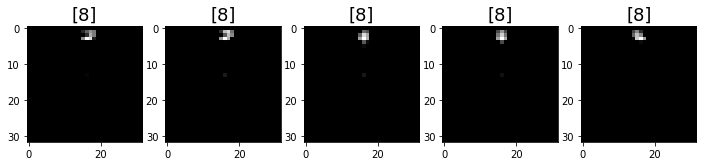

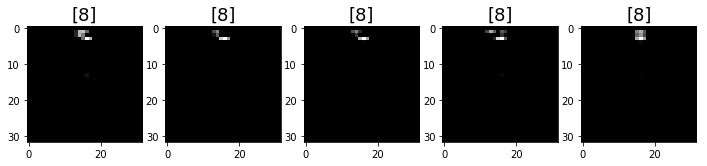

In [19]:
plots(data[:5], titles=label[:5])
plots(data[5:10], titles=label[5:10])
plots(data[10:15], titles=label[10:15])
plots(data[15:20], titles=label[15:20])

In [20]:
file_name = h5_list[2010]
data, label = h5file_array(file_name,use_channel=1)
data = data.reshape(data.shape[0],32,32)

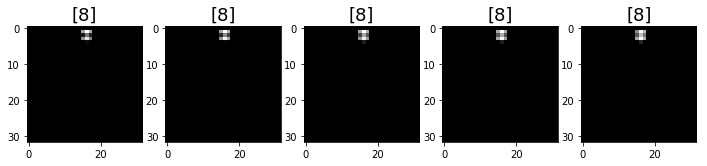

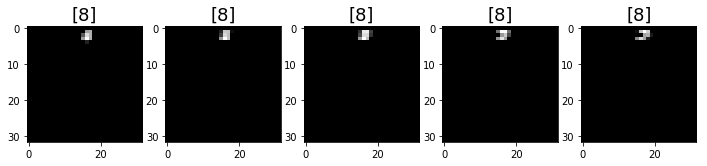

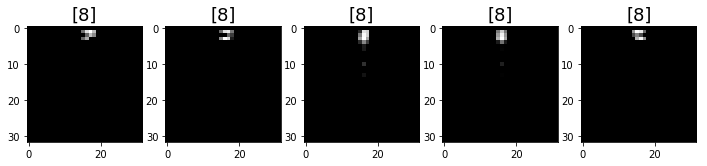

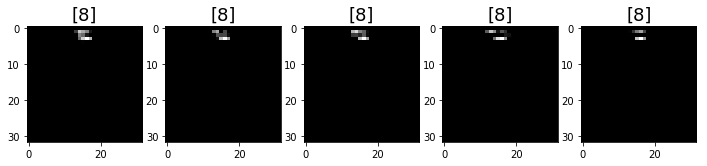

In [21]:
plots(data[:5], titles=label[:5])
plots(data[5:10], titles=label[5:10])
plots(data[10:15], titles=label[10:15])
plots(data[15:20], titles=label[15:20])

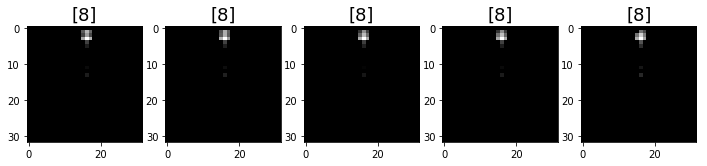

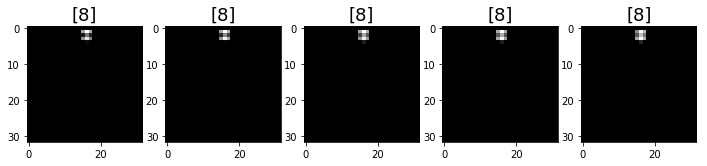

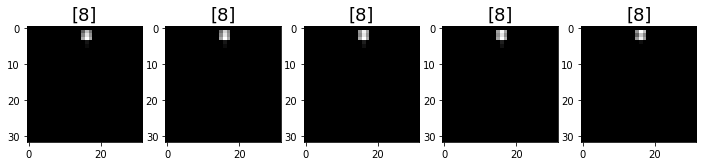

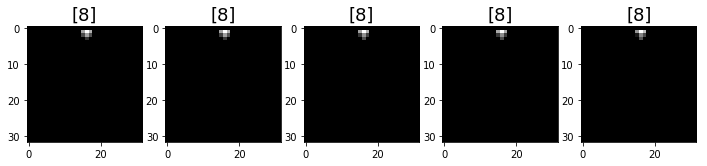

In [22]:
file_name = h5_list[2010]
data, label = h5file_array(file_name,use_channel=0)
data = data.reshape(data.shape[0],32,32)
plots(data[:5], titles=label[:5])

file_name = h5_list[2010]
data, label = h5file_array(file_name,use_channel=1)
data = data.reshape(data.shape[0],32,32)
plots(data[:5], titles=label[:5])

file_name = h5_list[2010]
data, label = h5file_array(file_name,use_channel=2)
data = data.reshape(data.shape[0],32,32)
plots(data[:5], titles=label[:5])

file_name = h5_list[2010]
data, label = h5file_array(file_name,use_channel=3)
data = data.reshape(data.shape[0],32,32)
plots(data[:5], titles=label[:5])

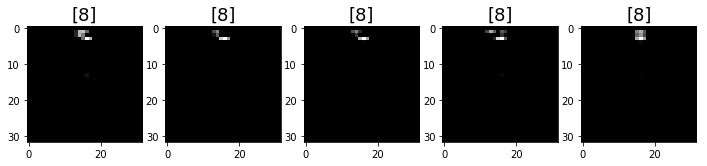

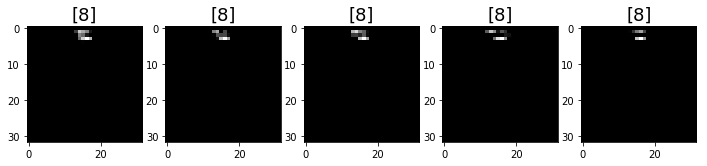

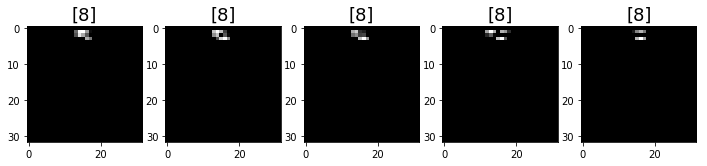

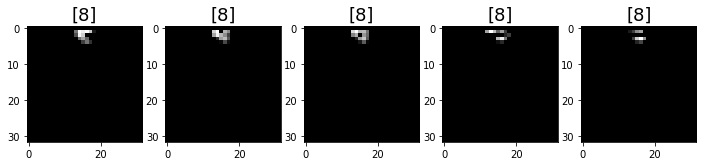

In [23]:
file_name = h5_list[2010]
data, label = h5file_array(file_name,use_channel=0)
data = data.reshape(data.shape[0],32,32)
plots(data[15:20], titles=label[15:20])

file_name = h5_list[2010]
data, label = h5file_array(file_name,use_channel=1)
data = data.reshape(data.shape[0],32,32)
plots(data[15:20], titles=label[15:20])

file_name = h5_list[2010]
data, label = h5file_array(file_name,use_channel=2)
data = data.reshape(data.shape[0],32,32)
plots(data[15:20], titles=label[15:20])

file_name = h5_list[2010]
data, label = h5file_array(file_name,use_channel=3)
data = data.reshape(data.shape[0],32,32)
plots(data[15:20], titles=label[15:20])

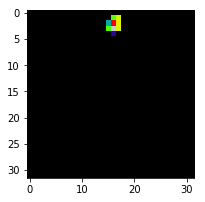

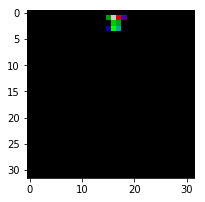

In [32]:
file_name = h5_list[2010]
data, label = h5file_array(file_name,use_channel=1)
data1 = data.reshape(data.shape[0],32,32)
data, label = h5file_array(file_name,use_channel=3)
data2 = data.reshape(data.shape[0],32,32)
#plots(data1[:5]-data2[:5], titles=label[:5])
plt.imshow(data1[5]).set_cmap('nipy_spectral')
plt.show()
plt.imshow(data2[5]).set_cmap('nipy_spectral')
plt.show()

In [42]:
dataset = np.zeros([len(h5_list),20,32,32,4])

In [43]:
labels = np.zeros([len(h5_list),20,1])

In [44]:
labels.shape

(2750, 20, 1)

In [58]:
dataset[0,:,:,:,ch].shape

(20, 32, 32)

In [55]:
ch = 0
file_name = h5_list[i]
data, label = h5file_array(file_name,use_channel=ch)
data = data.reshape(data.shape[0],32,32)
data = data[:20,:,:]

In [56]:
data.shape

(20, 32, 32)

In [59]:
for i in range(len(h5_list)):
    for ch in range(4):
        file_name = h5_list[i]
        data, label = h5file_array(file_name,use_channel=ch)
        data = data.reshape(data.shape[0],32,32)
        data = data[:20,:,:]
        label = label[:20]
        dataset[i,:,:,:,ch] = data
        labels[i] = label

In [60]:
dataset.shape

(2750, 20, 32, 32, 4)

In [61]:
labels[0,:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

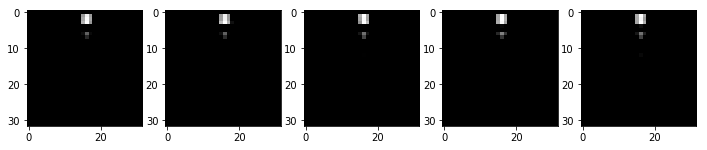

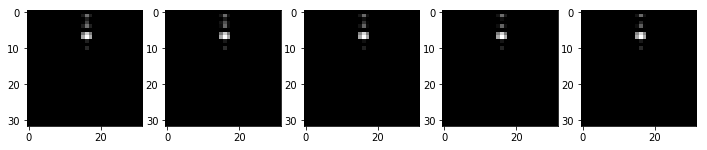

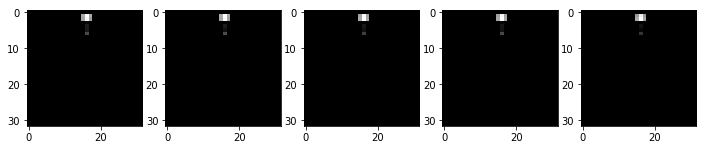

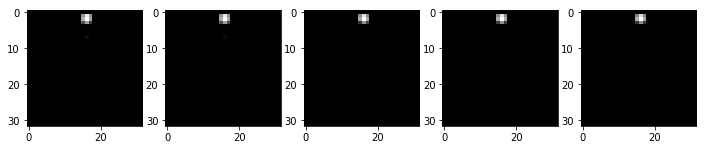

In [64]:
plots(dataset[0,:5,:,:,0])
plots(dataset[0,:5,:,:,1])
plots(dataset[0,:5,:,:,2])
plots(dataset[0,:5,:,:,3])

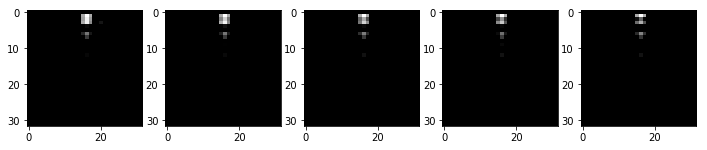

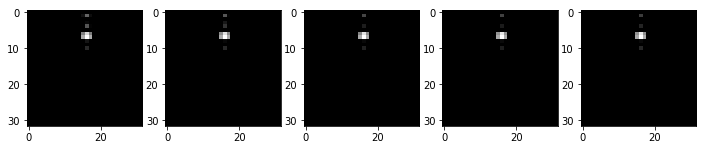

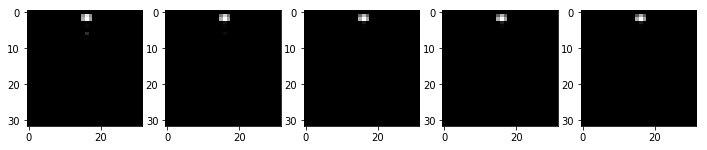

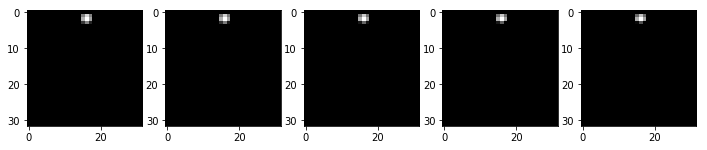

In [65]:
plots(dataset[0,5:10,:,:,0])
plots(dataset[0,5:10,:,:,1])
plots(dataset[0,5:10,:,:,2])
plots(dataset[0,5:10,:,:,3])

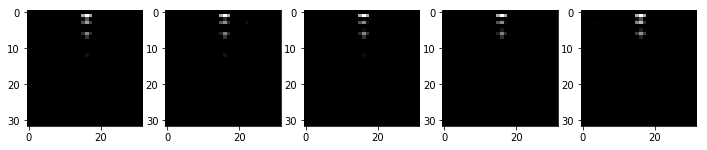

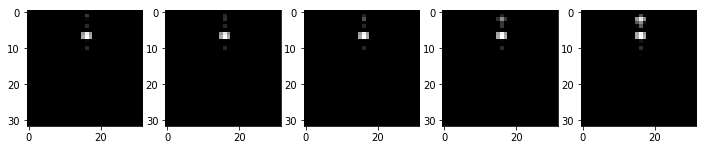

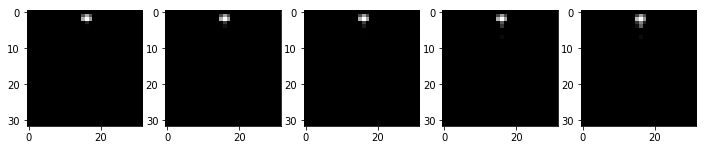

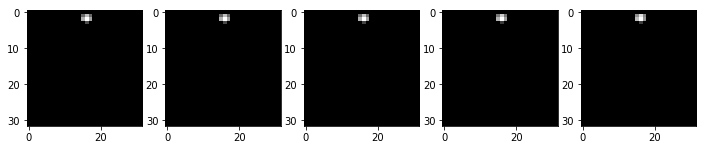

In [66]:
plots(dataset[0,10:15,:,:,0]) 
plots(dataset[0,10:15,:,:,1]) 
plots(dataset[0,10:15,:,:,2]) 
plots(dataset[0,10:15,:,:,3]) 

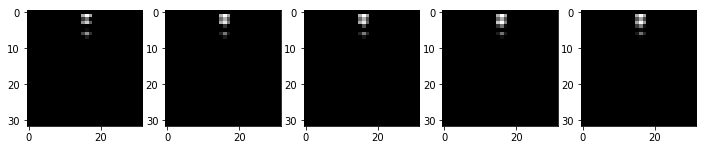

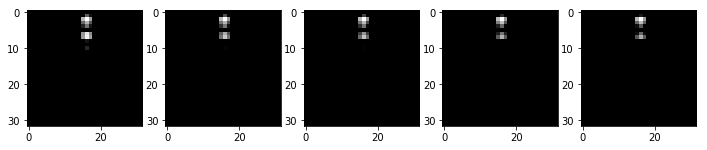

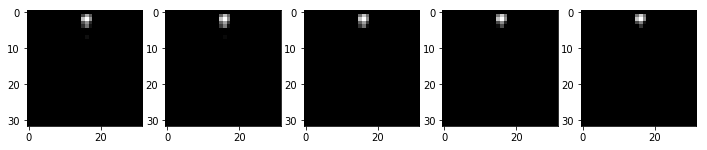

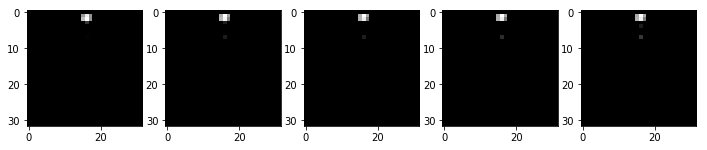

In [67]:
plots(dataset[0,15:20,:,:,0])
plots(dataset[0,15:20,:,:,1])
plots(dataset[0,15:20,:,:,2])
plots(dataset[0,15:20,:,:,3])

In [68]:
i = 1500
labels[i,0:5]

array([[6.],
       [6.],
       [6.],
       [6.],
       [6.]])

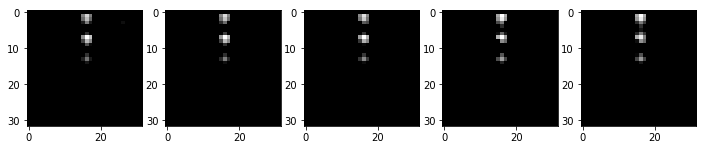

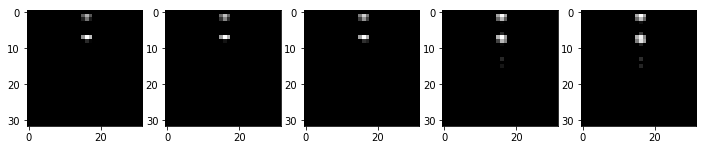

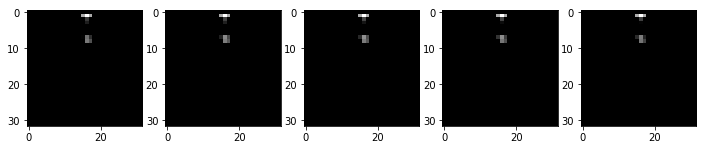

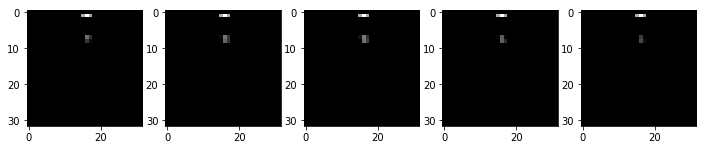

In [69]:
plots(dataset[i,0:5,:,:,0])
plots(dataset[i,0:5,:,:,1])
plots(dataset[i,0:5,:,:,2])
plots(dataset[i,0:5,:,:,3])

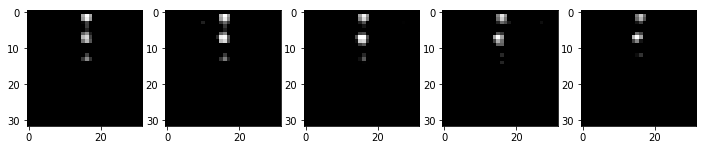

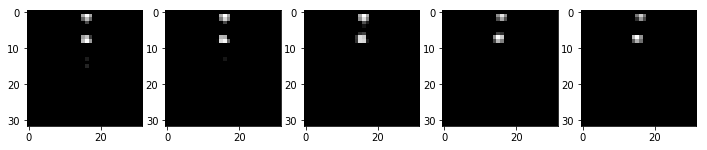

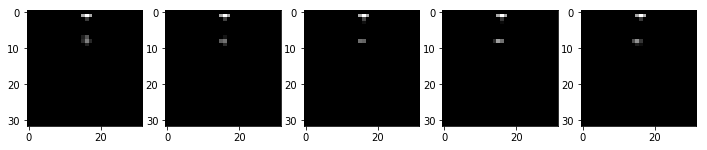

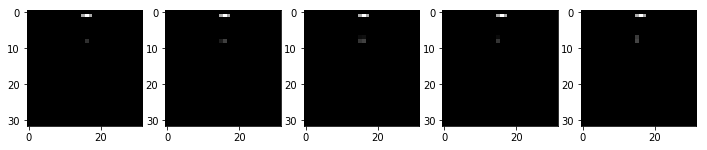

In [70]:
plots(dataset[i,5:10,:,:,0])
plots(dataset[i,5:10,:,:,1])
plots(dataset[i,5:10,:,:,2])
plots(dataset[i,5:10,:,:,3])

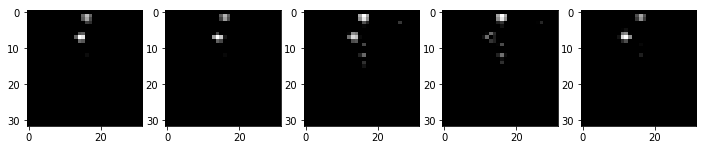

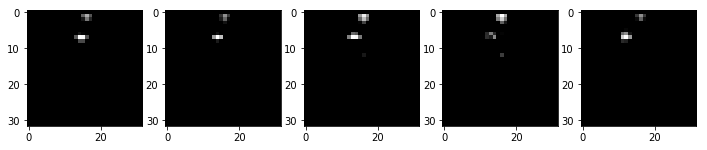

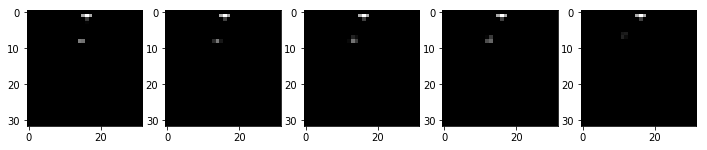

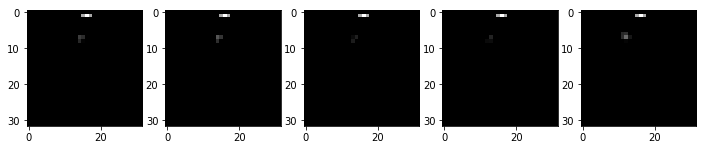

In [71]:
plots(dataset[i,10:15,:,:,0])
plots(dataset[i,10:15,:,:,1])
plots(dataset[i,10:15,:,:,2])
plots(dataset[i,10:15,:,:,3])

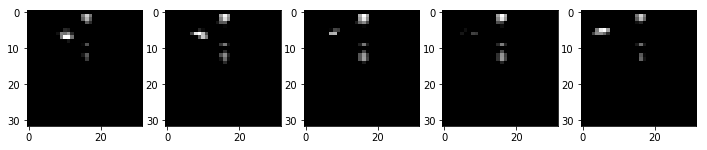

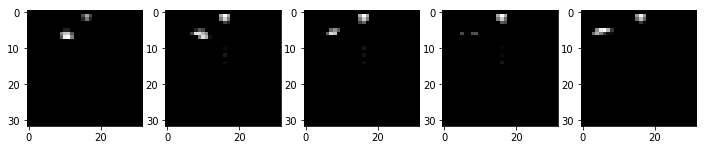

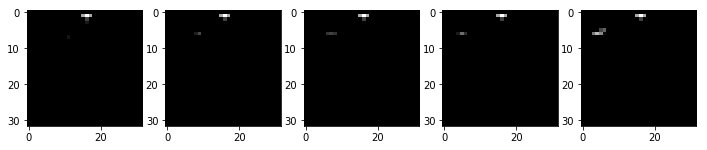

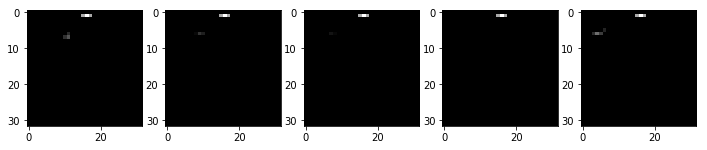

In [72]:
plots(dataset[i,15:20,:,:,0])
plots(dataset[i,15:20,:,:,1])
plots(dataset[i,15:20,:,:,2])
plots(dataset[i,15:20,:,:,3])

In [73]:
x = dataset[0,0,:,:]

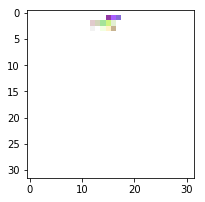

In [74]:
plt.imshow(dataset[1000,15,:,:])
plt.show()

In [75]:
x.dtype

dtype('float64')

In [76]:
import pickle

In [77]:
pickle.dump(dataset,open('dataset_with_4_channel.pickle','wb'))

In [78]:
pickle.dump(labels,open('labels_with_4_channel.pickle','wb'))